![logo](../../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# Water vapor amplification of Earth's Greenhouse Effect

Production date: 16-01-2026

Produced by: CNRS

## 🌍 Use case: Observing the radiative effect of water vapor over land and ocean and its long-term variations.

## ❓ Quality assessment question:
 - __Can satellite measurements document the known seasonal cycle of the water vapor feedback and the differences between land and ocean ?__

The water vapour is the most significant greenhouse gases, contributing to about half of the planet's global greenhouse effect ([[1]](https://doi.org/10.1029/2010JD014287), [[2]](https://journals.ametsoc.org/view/journals/bams/78/2/1520-0477_1997_078_0197_eagmeb_2_0_co_2.xml)). As a result, it plays a important role in shaping the Earth's radiation budget.

The warming induced by a forcing, such as an increase in CO$_2$ concentrations, leads to higher levels of water vapor through the Clausius-Clapeyron relationship [[3]](https://doi.org/10.1175/1520-0469%281967%29024<0241:TEOTAW>2.0.CO;2). The increasing of water vapor, in turn, intensifies the greenhouse effect because of its strong radiative properties in the thermal infrared : this is the well-known positive water vapor feedback that amplifies by almost a factor of two the initial warming [[4]](https://doi.org/10.1146/annurev.energy.25.1.441). This positive feedback mechanism underscores the critical importance of monitoring and comprehending the water vapour concentrations to accurately assess and predict its impacts on the Earth's climate system.

In this analysis, we study the contribution of water vapor to the greenhouse effect and aim to determine the relationship between the two variables. We quantify the amount of water vapor in the atmosphere using its vertically integrated value, known as Total Column Water Vapor (TCWV), which is obtained from satellite observations. The data used in this study is [__Global monthly and daily high-spatial resolution of total column water vapour from 2002 to 2017 derived from satellite observations__](https://cds.climate.copernicus.eu/datasets/satellite-total-column-water-vapour-land-ocean), available on the Climate Data Store of the Copernicus Climate Change Service. 


## 📢 Quality assessment statement 

```{admonition} These are the key outcomes of this assessment
:class: note

- The clear sky greenhouse effect is approximately a linear function of the total column water vapour [[5]](https://doi.org/10.1073/pnas.1809868115). 

- This analysis is based on all data for the period 2003-2017. Over these months, the relationship between the greenhouse effect, estimated for clear sky situations, and the total column water vapour is consistent with the literature, the value of the slope being close and in agreement with [[6]](https://doi.org/full/10.1029/2000JD000040), [[7]](https://doi.org/10.1002/2013JD020184) and [[8]](https://doi.org/10.1029/2019JD031017).

- The slope values vary slightly depending on the type of surface (approximately 20%), but remain consistent with the findings of [12], [13] and [14].

- An estimate of the clear sky water vapour feedback is computed by assuming that the relative humidity remains constant with warming, as in [[4]](https://doi.org/10.1146/annurev.energy.25.1.441). The humidity feedback obtained is in agreement with the IPCC report on this topic (Chapter 7, [[9]](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter07.pdf))

- The time series of water vapor feedback from combined surfaces and the time series of Clear-Sky greenhouse effect show seasonal variation in opposite phase. 

- The seasonal variation of Clear-Sky greenhouse effect is more important over land than over ocean, which is consistent with the literature [[15]](https://doi.org/10.1029/94JD00482)

- The time series of deseasonalized anomalies of Clear-Sky greenhouse effect shows a relative correlation with the Southern Oscillation events seen in the literature [[16]](https://doi.org/10.1029/2019JD031017). 

- Despite assumptions and the use of only the 2003-2017 period, the general agreement with the literature highlights the value of this water vapor data record for studies of the greenhouse effect of water vapor [[15]](https://doi.org/10.1029/94JD00482). The combination with other data records (cloud amount, surface temperature, and outgoing longwave radiation) of the CDS shows also the relevance of these data records for such climate studies.
```


## 📋 Methodology

The relationship between clear sky geenhouse effect and total column of water vapour is examined using the available datasets from the Climate Data Record (CDR) for surface temperature, clouds, and outgoing longwave radiation, detailed below. 

For the purposes of this analysis, these datasets are daily and it focuses on the __equatorial belt (30°N-30°S)__ over the period 2003-2017. As the [__C3S MERIS and SSM/I__](https://confluence.ecmwf.int/pages/viewpage.action?pageId=288349607) product is not available on a daily basis, this notebook uses the combined [__Near-Infrared and HOAPS__](https://www.cmsaf.eu/SharedDocs/Literatur/document/2022/saf_cm_dwd_pum_combi_tcdr_v1_1_pdf.pdf?__blob=publicationFile&v=5) product for the total column water vapour.

(satellite_satellite-total-column-water-vapour-land-ocean_validation_q03:Method-section-1)=
### The Greenhouse effect
The greenhouse effect (G, in W/m$^2$) is defined by the difference, in terms of longwave thermal radiation, between the radiation emitted to space at the top of the atmosphere, which is the OLR (in W/m$^2$), and the radiation emitted upward by the surface noted $F_{surf}$:
\begin{equation}
\text{G} = \text{F}_{surf} - \text{OLR}
\end{equation}

Where $\text{F}_{surf} = \epsilon_{surf} \ \sigma \ T_{surf} ^4 $

$T_{surf}$ is the surface temperature (in K), $\epsilon_{surf}$ is the surface emissivity (unitless) and $\sigma$ is the Stefan-Boltzmann constant ($\sigma = 5.67 \ 10^{-8}$ W/m$^2$/K$^4$).

With this definition, G has always positive values, the atmosphere trapping a part of the upward longwave radiation emitted by the surface, this trapping being done by greenhouse gases, clouds and, for a smaller part, aerosols. In the absence of clouds and aerosols, the clear sky greenhouse effect $\text{G}_{CS}$ is dominated by water vapour which accounts for 50 to 60% of the total greenhouse effect ([[1]](https://doi.org/10.1029/2010JD014287), [[2]](https://journals.ametsoc.org/view/journals/bams/78/2/1520-0477_1997_078_0197_eagmeb_2_0_co_2.xml)).

```{figure} cbf347f1-ba30-47d2-b409-6948093851a6.png
---
height: 300px
---
Contributions of the individual absorbers to the clear sky greenhouse effect. Numbers taken from [[5]](https://doi.org/10.1073/pnas.1809868115).
```

The estimation of $\text{G}_{CS}$ is performed by selecting only clear sky regions identified at the daily scale using the cloud fraction cover. 

The computation of $\text{F}_{surf}$ assumes that the surface emits thermal radiation very similar to blackbody emission, therefore $\epsilon_{surf}=1$. Considering a blackbody emission rather the true emissivity of sea water yield a small difference of less than 1\% as discussed by [[5]](https://doi.org/10.1073/pnas.1809868115). For this notebook, this computation is a good approximation even though the sand in desert areas can reduce emissivity by 0.7, which can alter the flux results.     

```{figure} 2c3bad02-bc8f-4bd8-81e8-d6d676d4de7c.png
---
height: 500px
---
Global land emissivity calculated from measurements of thermal infrared radiation (8-12 µm) by the ASTER instrument, adapted from the [__NASA website__](https://terra.nasa.gov/news/aster-global-emissivity-database-100-times-more-detailed-than-its-predecessors), Credit: NASA/GSFC/METI/ERSDAC/JAROS, and U.S./Japan ASTER Science Team.
```

The obtained $\text{G}_{CS}$ is then compared with the corresponding TCWV, and their relationship is visualized as a function of TCWV.
Lastly, this derived relationship is utilized to estimate the water vapour feedback, $f_{wv}$.

Several methods are used to compute the greenhouse effect and the water vapor feedbacks [[6]](https://doi.org/full/10.1029/2000JD000040):
- a partial radiative perturbation method, comparing a control climate and a perturbed climate 
- a radiative kernel technique, comparing point-by-point perturbed profiles of water vapor and their radiative effect
- a linear regression between the clear sky longwave top-of-the-atmosphere flux to the global mean.

Here we use the latter method to assess the relevance of CDS data for estimating the water vapor feedback

(satellite_satellite-total-column-water-vapour-land-ocean_validation_q03:method-section-2)=
### The water vapour feedback

The fundamental Clausius-Clapeyron equation gives the saturation vapor pressure $e_{sat}(T)$ (in hPa) at a given temperature $T$: 
\begin{equation}
e_{sat}(T) = 6.11 \times \exp{ \left[ -\frac{L_v}{R_v} \times \left(\frac{1}{T} - \frac{1}{273.15}\right) \right]}
\end{equation}

with $L_v = 2.5 \ 10^6$ (J/kg) is the latent heat for vaporisation and $R_v = 461.51$ (J/kg/K) is the specific gas constant for water vapor. $e_{sat}(T)$ defines the capacity of the atmosphere to hold water vapor before it condensates, for a given air temperature $T$.

According to this equation, it can be shown that the sensitivity of $e_{sat}(T)$ to a temperature increase is given by:

\begin{equation}
\frac{ d (de_{sat}/ e_{sat})}{dT} = \ \frac{L_v}{R_v \ T^2} \ = \ \alpha(T) 
\end{equation}

with $\alpha(T)$ standing for the Clausius-Clapeyron scaling, which depends strongly on $T$.

Most water vapor resides in the lower troposphere and in the tropics because there temperatures are warmesest. For air temperature typical of the tropical lower atmosphere, ranging between 270 and 310K, $\alpha(T)$ has values between 6.5 to 7.5\% for a 1-K increase of air temperature (see [[8]](https://doi.org/10.1029/2019JD031017)). 

As stated in numerous studies addressing the perturbation of the hydrological cycle to surface warming (see [[3]](https://doi.org/10.1175/1520-0469%281967%29024<0241:TEOTAW>2.0.CO;2), [[7]](https://doi.org/10.1002/2013JD020184), [[9]](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter07.pdf) and [[10]](https://doi.org/abs/10.1029/1998JD900007)) tropospheric relative humidity tends to be maintained fixed as climate warms. The small changes observed in the tropospheric relative humidity do not affect significantly the column integrated water vapor [[11]](https://journals.ametsoc.org/view/journals/clim/19/21/jcli3990.1.xml).

Formally, the global climate feedback $f$ (in W/m$^2$/K) represents the sensitivity of the global energy balance, which considers longwave and shorwave fluxes, to a perturbation of the surface temperature. 

Here we consider the clear sky longwave feedback and the water vapor contribution to this feedback, and this feeback parameter $f$ can be broken down into several components, among them the water vapor.

For the present analysis, we look at the part of the clear sky greenhouse effect $\text{G}_{CSwv}$ due to water vapor. Then, and using the Clausius-Clapeyron scaling, the water vapor feedback $f_{wv}$ can be written as: 

\begin{align}
f_{wv} & = \frac{d \ \text{G}_{CS wv}}{d \ T_{surf}} \\
       & = \frac{d \ \text{G}_{CS wv}}{d \ TCWV} \frac{d \ TCWV wv}{d \ T_{surf}}
\end{align}

Where $d \ TCWV / d \ T_{surf}$ represents the water vapor response to the temperature variations, while $d \ \text{G}_{CS w} / d \ TCWV$ is the net change in upwelling thermal radiation caused by the associated changes in the water vapor content.

The TCWV is the integral of the water vapor amount q (in kg/kg) over the atmospheric column. Therefore, $TCWV \sim q$.
Moreover, with the approximation of a fixed atmospheric relative humidity with surface warming, then $ d q / \overline{q} = d e_{sat}/ \overline{e_{sat}}$, the notation $\overline{X}$ denoting a spatial average of the parameter $X$.

Combining all the parameters together, assuming constant RH and a 1-K surface warming, it comes that the water vapor feeback can be computed using TCWV according to:
\begin{equation}
f_{wv} \ = \ \frac{d \ \text{G}_{CS wv}}{d \ TCWV} \ \overline{TCWV} \ \alpha(T) 
\end{equation}


### Method

The analysis comprises the following steps:

__1. [](satellite_satellite-total-column-water-vapour-land-ocean_validation_q03:data-section-1)__
 - Import the relevant packages.
 - Define the parameters of the analysis and set the dataset requests

__2. [](satellite_satellite-total-column-water-vapour-land-ocean_validation_q03:data-section-2)__
 - Download the variables of interest: Columnar water vapor is obtained from [__Global monthly and daily high-spatial resolution of total column water vapour from 2002 to 2017 derived from satellite observations (TCWV)__](https://cds.climate.copernicus.eu/datasets/satellite-total-column-water-vapour-land-ocean), Clear sky is obtained from [__Cloud properties global gridded monthly and daily data from 1979 to present derived from satellite observations (clouds)__](https://cds.climate.copernicus.eu/datasets/satellite-cloud-properties), Surface Temperature is obtained from [__ERA5 post-processed daily statistics on single levels from 1940 to present (SKT)__](https://cds.climate.copernicus.eu/datasets/derived-era5-single-levels-daily-statistics), Outgoing Longwave Radiation is obtained from [__Earth's radiation budget from 1979 to present derived from satellite observations (OLR)__](https://cds.climate.copernicus.eu/datasets/satellite-earth-radiation-budget). __Southern Oscillation Index (SOI)__ is obtained from [__National Centers for Environmental Information__](https://www.cpc.ncep.noaa.gov/data/indices/soi).
 -  The datasets are colocated in space and time over the equatorial belt (30°S-30°N).
 -  Gridboxes with cloudy coverage greater than 10% are rejected. Moreover, only the well retrieved TCWV and SKT are considered. The amount of radiation emitted by the surface is computed assuming blackbody behavior of the surface ($\epsilon_{surface}=1$).
 -  The clear sky greenhouse effect G$_\text{CS}$ is obtained by subtracting outgoing lonwave radiation and surface emission longwave emission.
   
__3. [](satellite_satellite-total-column-water-vapour-land-ocean_validation_q03:Plot-and-results)__
 - The clear sky greenhouse effect is plotted as a function of the TCWV and the surface temperature over land, ocean, combined surfaces. The slope of the linear regression is computed and used to estimate the water vapor feedback $f_{wv}$. 
 - Plot the time series of the clear-sky greenhouse effect over land, ocean, combined surfaces and of the water-vapor feedback for the combined surfaces.
 - Plot the seasonal cycle of the Clear-Sky greenhouse effect and water vapor feedback over land, ocean and combined surfaces.
 - Plot the deseasonalized anomalies of Clear-Sky greenhouse effect for the combined surfaces and the Southern Oscillation Index (SOI)
 - Final results are compared with proper references.

## 📈 Analysis and results

(satellite_satellite-total-column-water-vapour-land-ocean_validation_q03:data-section-1)=
### Choose the data to use and setup code

#### **Import packages**

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from scipy.stats import linregress
from xhistogram.xarray import histogram
import math
from matplotlib.colors import LogNorm
import numpy as np 
from c3s_eqc_automatic_quality_control import diagnostics, download, plot, utils

import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/carbone_sullivan/.cdsapirc")

#### **Define parameters**

This use case is developed for the period 2003-2017 and for the equatorial belt, restricted to 30$^\circ$S-30$^\circ$N.

In [2]:
# Set parameters
year_start = 2003
year_stop = 2017

# Region
lon_slice = slice(-180, 180)
lat_slice = slice(-30, 30)

# colors_figure
colors_fig = ['green', 'blue', 'black']

# variables and surfaces
variables = ["tcwv", "skt", "LW_flux", "GCS"]
surface = ["land", "ocean", "land_ocean"]

#### **Set the data request**

Four datasets are requested from the CDS :
- Total Column Water Vapor (TCWV)
- Cloud Fraction Cover (CFC)
- Skin Temperature (SKT)
- Outgoing Longwave Radiation (OLR)

One dataset is requested from the NASA website :
- Southern Oscillation Index (SOI)

In [3]:
requests = {}
time_request = {
    "year": [str(year) for year in range(year_start, year_stop + 1)],
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
}

requests["satellite-total-column-water-vapour-land-ocean"] = time_request | {
    "product": "near_infrared_hoaps_combined",
    "horizontal_aggregation": ["0_5_x_0_5"],
    "temporal_aggregation": "daily",
    "variable": "all",
}
requests["satellite-cloud-properties"] = time_request | {
    "product_family": "clara_a3",
    "origin": "eumetsat",
    "variable": ["cloud_fraction"],
    "climate_data_record_type": "thematic_climate_data_record",
    "time_aggregation": "daily_mean",
}
requests["derived-era5-single-levels-daily-statistics"] = time_request | {
    "product_type": "reanalysis",
    "variable": ["skin_temperature"],
    "daily_statistic": "daily_mean",
    "time_zone": "utc+00:00",
    "frequency": "1_hourly",
}
requests["satellite-earth-radiation-budget"] = time_request | {
    "product_family": "clara_a3",
    "origin": "eumetsat",
    "variable": ["outgoing_longwave_radiation"],
    "climate_data_record_type": "thematic_climate_data_record",
    "time_aggregation": "daily_mean",
}

In [4]:
def coarsen_and_regionalise(ds, lon_slice, lat_slice, slicer, coarsen):
    if slicer:
        ds = ds.isel(slicer)
    if coarsen:
        ds = ds.coarsen(coarsen).mean(keep_attrs=True)
    ds = utils.regionalise(ds, lon_slice=lon_slice, lat_slice=lat_slice)
    return ds

(satellite_satellite-total-column-water-vapour-land-ocean_validation_q03:data-section-2)=
### Download the datasets and perform space-time aggregation

The datasets are now downloaded.

In [5]:
datasets = []
for collection_id, request in requests.items():
    slicer = {}
    if collection_id == "derived-era5-single-levels-daily-statistics":
        slicer["latitude"] = slice(1, None, 2)
        slicer["longitude"] = slice(1, None, 2)

    coarsen = {}
    if collection_id in [
        "satellite-cloud-properties",
        "satellite-earth-radiation-budget",
    ]:
        coarsen["latitude"] = 2
        coarsen["longitude"] = 2
    ds = download.download_and_transform(
        collection_id,
        request,
        chunks={"year": 1, "month": 1},
        transform_func=coarsen_and_regionalise,
        transform_func_kwargs={
            "lon_slice": lon_slice,
            "lat_slice": lat_slice,
            "slicer": slicer,
            "coarsen": coarsen,
        },
    )
    datasets.append(ds)
ds_daily = xr.merge([ds.drop_dims(set(ds.dims) & {"nv", "bnds"}) for ds in datasets])

kwargs = {
    "filepath_or_buffer": "https://www.cpc.ncep.noaa.gov/data/indices/soi",
    "sep": r"\s+",
    "nrows": year_stop - 1950,
    "index_col": "YEAR",
}
df_slp_anomaly = pd.read_csv(skiprows=3, **kwargs)
df_slp_standardized = pd.read_csv(skiprows=87, **kwargs)

df_long = (
    df_slp_standardized
    .reset_index()
    .melt(id_vars='YEAR', var_name='MONTH', value_name='ANOMALY')
)

month_map = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,
    'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8,
    'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

df_long['MONTH_NUM'] = df_long['MONTH'].map(month_map)

df_long['DATE'] = pd.to_datetime(
    dict(year=df_long['YEAR'],
         month=df_long['MONTH_NUM'],
         day=1)
)
df_long = df_long.sort_values('DATE').drop(columns = ['YEAR', 'MONTH', 'MONTH_NUM'])
df_long = df_long.set_index('DATE').loc[f'{year_start}':f'{ year_stop}'].reset_index()

100%|██████████| 180/180 [00:28<00:00,  6.34it/s]
/data/wp5/.tmp/ipykernel_2306676/1710697296.py:28: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds_daily = xr.merge([ds.drop_dims(set(ds.dims) & {"nv", "bnds"}) for ds in datasets])


#### **Temporal and spatial aggregation**
Here are the spatial and temporal resolutions of all data records : 
 - Cloud Fraction Cover : 0.25$^\circ$ / 1-day
 - Skin Temperature : 0.25$^\circ$ / 1-day
 - Outgoing Longwave Radiation : 0.25$^\circ$ / 1-day
 - Total Column Water Vapor : 0.5$^\circ$ / 1-day

This it is a cross-variable analysis, the study requires to process all the datasets at the same horizontal and temporal resolutions. 
The common spatial aggregation is 0.5$^\circ$ and the data records are processed at the daily and monthly scales. 

#### **Computation of the greenhouse effect**
The variables (daylies and monthlies) are stored into data frames for a better handling.

Then the clear sky scenes are selected using the CFC. A threshold of 10\% of cloud cover within each grid cell is a good compromise between the definition of the clear sky greenhouse effect (mostly clear skies, regardless of cloud altitude) and the number of scenes that are retained for the representativity of the analysis. The grid cells are also filtered from erroneous estimates.

The clear sky greenhouse effect (G$_{CS}$) and the water vapor feedback parameter ($f_{wv}$) are then computed using the methods described above.

A mask land/ocean is used to compare the two types of scenes separately.

In [6]:
# Compute clear sky greenhouse effect and add to the merged dataset
ds_daily["GCS"] = 5.67 * 10 ** (-8) * (ds_daily["skt"] ** 4) - ds_daily["LW_flux"]
ds_daily["GCS"].attrs = {"long_name": "clear sky greenhouse effect", "units": "W m−2"}

# Selection of clear sky regions (at most 10\% of cloud fraction within each grid cell)
# and quality of retrieved SST and TCVW (SST > 0°K and TCWV > 0 mm)
mask = (
    (ds_daily["cfc"] < 10) & (ds_daily["skt"] > 0) & (ds_daily["tcwv"] > 0)
)  ## & (ds_daily["GCS"] > 120)

ds_daily = ds_daily.where(mask)

# Compute montly mean from daily & masked data
ds_monthly = ds_daily.resample(time="M").mean()

/data/common/miniforge3/envs/wp5/lib/python3.12/site-packages/xarray/groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


In [7]:
df_monthly = {}

for idx, surf in enumerate(surface):
    series = {}

    # sélection selon surface_type_flag (comme toi)
    if idx < 2:
        ds_sel = ds_monthly.where(ds_monthly["surface_type_flag"] == idx)
    else:
        ds_sel = ds_monthly

    for var in variables:
        da = ds_sel[var]

        df_var = da.to_dataframe(name=var).reset_index()  

        cols = list(df_var.columns)
        index_cols = [c for c in cols if c not in ("realization","latitude", "longitude", var)]
        
        series[var] = df_var.set_index(index_cols)[var]

    # Construire le DataFrame final (les Series s'aligneront sur le même index si applicable)
    df_monthly[f"df_monthly_{surf}"] = pd.DataFrame(series).dropna().sort_index()

dates = df_monthly["df_monthly_land_ocean"].resample("M").mean().index

/data/wp5/.tmp/ipykernel_2306676/3365866211.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = df_monthly["df_monthly_land_ocean"].resample("M").mean().index


(satellite_satellite-total-column-water-vapour-land-ocean_validation_q03:Plot-and-results)=
### Plot and description of the results

#### **Scatter plots: comparison of surface type**

Before evaluating the contribution of water vapor to the Clear-Sky greenhouse effect and its variabilities in time, a sanity check is done by comparing the rate of change of G$_\text{CS}$ for a given change in surface temperature. This sanity check allows to compare with reference studies using satellite data.

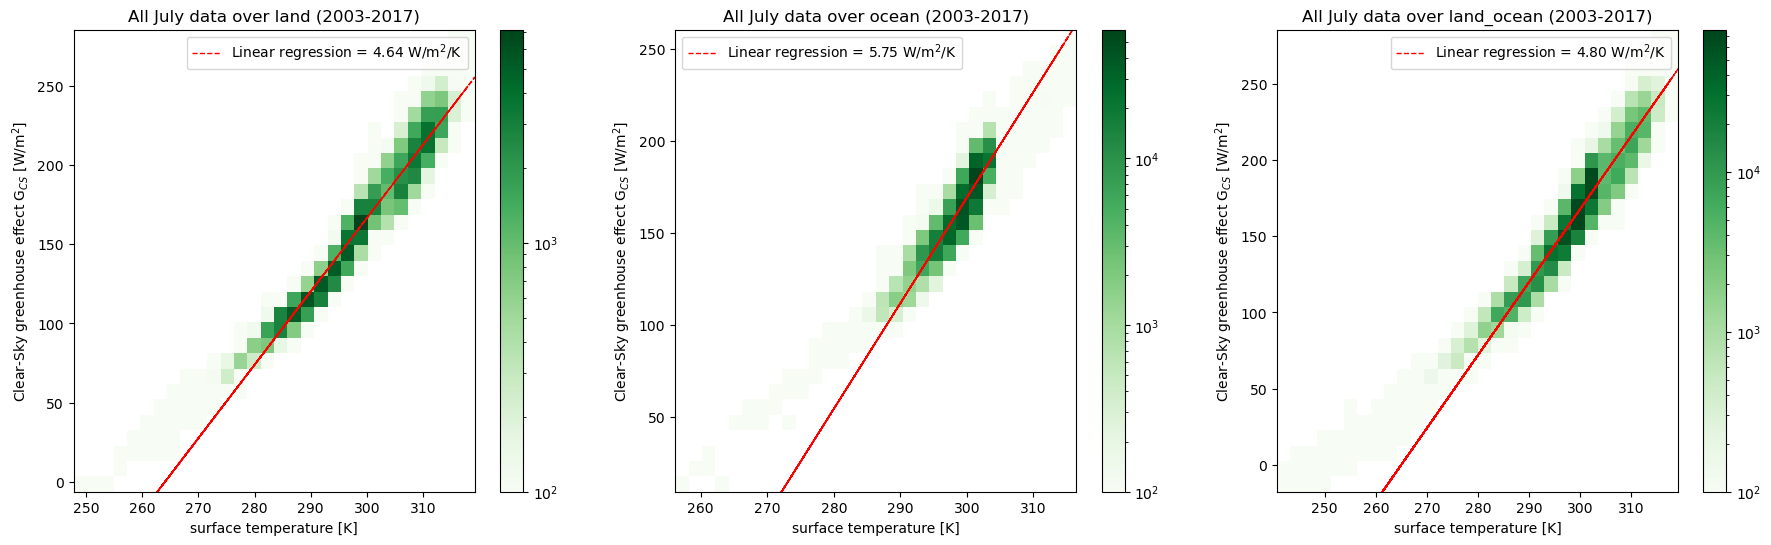

In [59]:
fig , axs = plt.subplots(1, 3, figsize =(22,6))
for idx, surf in enumerate (surface):
    df_month_loc = df_monthly[f"df_monthly_{surf}"][df_monthly[f"df_monthly_{surf}"].index.month == 7]
    hist = axs[idx].hist2d(df_month_loc['skt'], df_month_loc['GCS'], cmap="Greens", bins=[30, 30], norm=LogNorm(vmin=100))
    axs[idx].set_title(f"All July data over {surf} (2003-2017)")
    axs[idx].set_xlabel("surface temperature [K]")
    axs[idx].set_ylabel("Clear-Sky greenhouse effect G$_{CS}$ [W/m$^2$]")
    fig.colorbar(hist[3], ax = axs[idx])
    
    # Plot linear fit
    slope_monthly, intercept, r, p, se = linregress(df_month_loc['skt'],df_month_loc['GCS'])
    axs[idx].plot(df_month_loc['skt'],slope_monthly*df_month_loc['skt']+intercept, 
             color="red", linestyle="dashed", linewidth=1,
             label=f"Linear regression = {slope_monthly:.2f} W/m$^2$/K")
    
    axs[idx].legend()

*__Figure 1__: Distributions of the clear-sky greenhouse effect G$_{CS}$ according to SKT for monthly data over 30°N-30°S for land (left), ocean (middle) and combined surfaces (right) of all July months during 2003-2017. The colorscales represent the density of points. The red dashed line are the linear regressions, with the slope reported on the top of each figures.*

The slopes of the linear regression lines slightly differ following the surface type by about 20% with 5.75 W/m$^2$/K and 4.64 W/m$^2$/K for ocean and land surfaces, respectively. These differences can be explaine by the approximation of the surface emissivity (fixed to 1) for the computation of $\text{F}_{surf}$ ([](satellite_satellite-total-column-water-vapour-land-ocean_validation_q03:Method-section-1)). Consequently, these differences naturally result in a slightly lower slope on the combined surfaces than on the ocean.  

Despite these differences, the value of the slopes $d \ G_{CS}/d T_{surf}$ over ocean surfaces are consistent with the findings of [[12]](https://journals.ametsoc.org/view/journals/clim/19/1/jcli3611.1.xml?utm_source=wiley&getft_integrator=wiley), [[13]](https://doi.org/10.1038/351027a0) and [[14]](https://doi.org/epdf/10.1029/92JD00729), with reported values for given months ranging from 5.6 W/m$^2$/K to 6.3 W/m$^2$/K (monthly averages). Although the values for slopes over land and combined surfaces differ slightly, they are of the same order of magnitude. 

Once the sanity check done by comparing the rate of change of GCS for a given change in surface temperature, the rate of change of GCS for a given change in TCWV is done. 

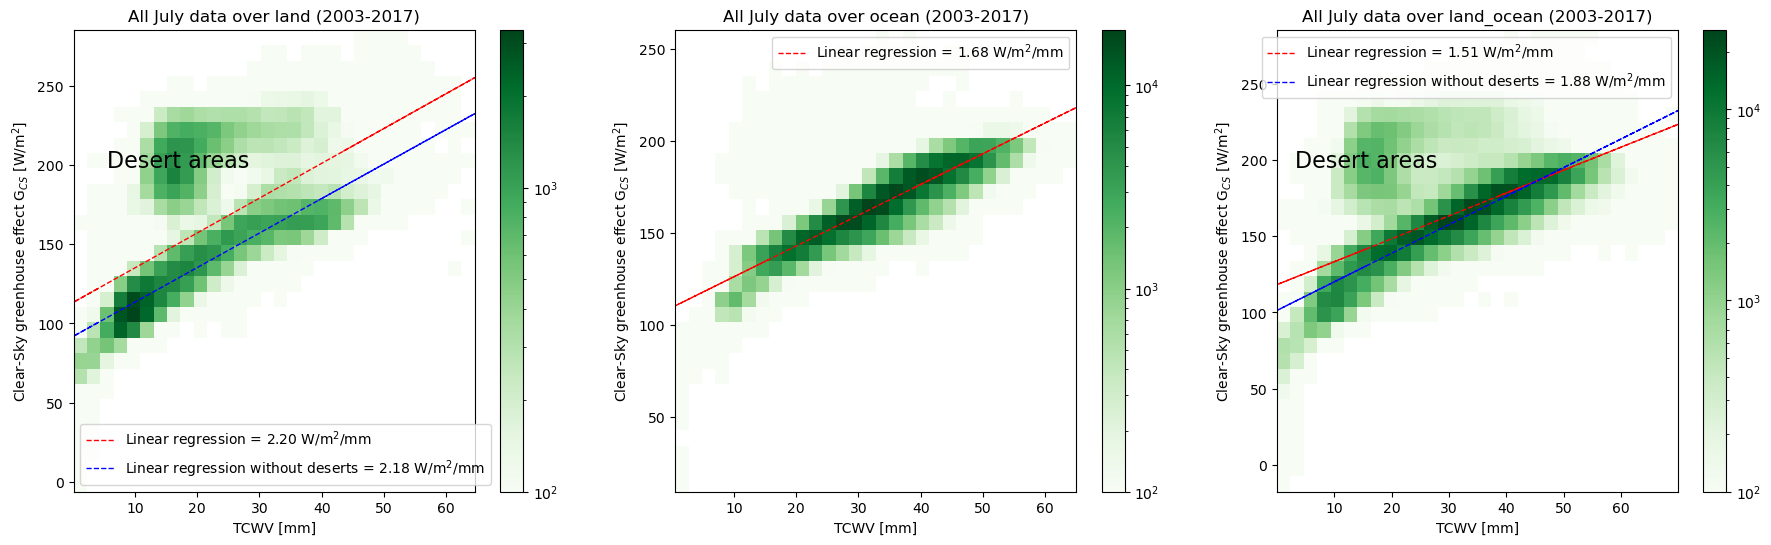

In [58]:
fig , axs = plt.subplots(1, 3, figsize =(22,6))
for idx, surf in enumerate (surface):
    df_month_loc = df_monthly[f"df_monthly_{surf}"][df_monthly[f"df_monthly_{surf}"].index.month == 7]
    hist = axs[idx].hist2d(df_month_loc['tcwv'], df_month_loc['GCS'], cmap="Greens", bins=[30, 30], norm=LogNorm(vmin=100))
    axs[idx].set_title(f"All July data over {surf} (2003-2017)")
    axs[idx].set_xlabel("TCWV [mm]")
    axs[idx].set_ylabel("Clear-Sky greenhouse effect G$_{CS}$ [W/m$^2$]")
    fig.colorbar(hist[3], ax = axs[idx])
 
    # Plot linear fit

    if surf == 'land' or surf == 'land_ocean' :
        for i in range (2):
            if i == 0 :
                slope_monthly, intercept, r, p, se = linregress(df_month_loc['tcwv'],df_month_loc['GCS'])
                axs[idx].plot(df_month_loc['tcwv'],slope_monthly*df_month_loc['tcwv']+intercept, 
                         color="red", linestyle="dashed", linewidth=1,
                         label=f"Linear regression = {slope_monthly:.2f} W/m$^2$/mm")
            else :
                tcwv_bis = []
                GCS_bis = []
                for t, g in zip (df_month_loc['tcwv'], df_month_loc['GCS'] ) :
                   if t > 11 and t < 21 and g > 160 or g > 200 :
                       pass 
                   else : 
                       tcwv_bis.append(t)
                       GCS_bis.append(g)
                       
                tcwv_bis = np.array(tcwv_bis)
                GCS_bis  = np.array(GCS_bis)        
                slope_monthly, intercept, r, p, se = linregress(tcwv_bis,GCS_bis)
                axs[idx].plot(tcwv_bis,slope_monthly*tcwv_bis+intercept, 
                         color="blue", linestyle="dashed", linewidth=1,
                         label=f"Linear regression without deserts = {slope_monthly:.2f} W/m$^2$/mm")

    else :
        slope_monthly, intercept, r, p, se = linregress(df_month_loc['tcwv'],df_month_loc['GCS'])
        axs[idx].plot(df_month_loc['tcwv'],slope_monthly*df_month_loc['tcwv']+intercept, 
                 color="red", linestyle="dashed", linewidth=1,
                 label=f"Linear regression = {slope_monthly:.2f} W/m$^2$/mm")
    
    axs[idx].legend()
fig.text(0.14, 0.65, "Desert areas", color = 'black', fontsize=16 )
fig.text(0.68, 0.65, "Desert areas", color = 'black', fontsize=16 )
plt.show()

*__Figures 2__ : Density diagrams of the clear sky greenhouse effect G$_{CS}$ according to bins of TCWV monthly data over 30°N-30°S for land (left), ocean (middle) and combined surfaces (right) of all July months during 2003-2017. The colorscales represent the density of points. The red and blue dashed lines are the linear regressions made with all datas and without over desert areas datas, respectively. The slope are reported on the top of each figures.*

The results show a linear relationship between the clear sky greenhouse effect and the Total Columns of Water Vapour, in agreement with previous research (see [[5]](https://doi.org/10.1073/pnas.1809868115), [[6]](https://doi.org/full/10.1029/2000JD000040) and [[7]](https://doi.org/10.1002/2013JD020184)).

According to the section '[](satellite_satellite-total-column-water-vapour-land-ocean_validation_q03:method-section-2)' in the __Methodology__ Chapter, those results can be used to estimate $f_{wv}$:

\begin{align}
\frac{d \ \text{G}_{CS wv}}{d \ TCWV} \ & \ \text{is estimated from the slope of the linear regression G$_{CS}$=f(TCWV) in W/m$^2$/mm } \\ 
\overline{TCWV}  & \ \text{is the areal average of TCWV over the tropical belt in mm} \\
CC & = 0.07 \ \text{K$^{-1}$} \ \ \text{is the Clausius-Clapeyron rate of 7\%/K}
\end{align}

As seens previously on the figure 1, the slopes of the linear regression lines slightly differ following the surface again by about 20% with 1.68 W/m$^2$/K and 2.20 W/m$^2$/K for ocean and land surfaces, respectively. The slopes of red and blue dashed lines also differ slightly, showing that desert areas have a slight impact on the results due to the sand emissivity. 

Regardless of these differencies and as stated in the [](satellite_satellite-total-column-water-vapour-land-ocean_validation_q03:Method-section-1), the contribution of water vapor to the clear sky greenhouse effect is estimated to be $\sim$ 60\%. Therefore, we can reasonably consider that 60\% of the slope G$_{CS}$=f(TCWV) corresponds to the water vapor contribution $\text{G}_{CS wv}$

In [57]:
# Variables to estimate the water vapor feedback, from the equation in the Methodology section
for idx, surf in enumerate (surface):
    print(surf)
    df_month_loc = df_monthly[f"df_monthly_{surf}"][df_monthly[f"df_monthly_{surf}"].index.month == 7]
    TCWV_mean = df_month_loc.tcwv.mean()
    SKT_mean = df_month_loc.skt.mean()
    slope_monthly, intercept, r, p, se = linregress(df_month_loc['tcwv'], df_month_loc['GCS'])
    feedback = 0.6 * slope_monthly * TCWV_mean * 0.07
    print(f"slope: {slope_monthly:.2f} W/m^2/mm")
    print(f"tropical mean TCWV: {TCWV_mean:.2f} mm")
    print(f"tropical mean SKT: {SKT_mean:.2f} K")
    print(f"feedback: {feedback:.2f} W/m^2/K")
    print("\n")

land
slope: 2.20 W/m^2/mm
tropical mean TCWV: 20.98 mm
tropical mean SKT: 298.42 K
feedback: 1.94 W/m^2/K


ocean
slope: 1.68 W/m^2/mm
tropical mean TCWV: 33.36 mm
tropical mean SKT: 299.31 K
feedback: 2.35 W/m^2/K


land_ocean
slope: 1.51 W/m^2/mm
tropical mean TCWV: 29.91 mm
tropical mean SKT: 299.00 K
feedback: 1.89 W/m^2/K




These results are close of the water vapor feedback reported in the IPCC report Chapter 7 ([[9]](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter07.pdf) )and summarized in Figure 7.20 (inset on the 'Global warming contributions from individual radiative feedbacks'). The reported values range between 2.2 and 3.5 W/m$^2$/K. The ocean surface has a greater water vapor feedback than the land surface due to higher humidity.

Here we have looked at the relationship between clear sky greenhouse effect and TCWV is studied on the time scale of all July months over the period 2003-2017. Furthermore, previous fundamental studies have shown that the water vapor feedback varies at the seasonal scale [[15]](https://doi.org/10.1029/94JD00482).
To exploit the temporal coverage of CDS data, this notebook examines the evolution of water vapor feedback over time which allows to look at this seasonal variability as well as to look at the impact of the natural climate variability (such as El Nino events).

#### __Interannual variability__

This part provides an overview of the evolution of the Clear-Sky greenhouse effect and the water vapor feedback in the equatorial belt (30°S-30°N) during the period 2003-2017. 

In [13]:
feedback_surf = {}
season_cycle_feedback_surf = {}
for idx, surf in enumerate (surface):
    feedback_surf[f'{surf}'] = []
    season_cycle_feedback_surf[f'{surf}'] = []
    for m , month in enumerate (dates) :
        df_loc = df_monthly[f'df_monthly_{surf}'].loc[f'{month}']
        TCWV_mean = df_loc.tcwv.mean()
        SST_mean = df_loc.skt.mean()
        slope_monthly, intercept, r, p, se = linregress(df_loc['tcwv'], df_loc['GCS'])
        feedback = 0.6 * slope_monthly * TCWV_mean * 0.07
        feedback_surf[f'{surf}'].append(feedback)

    season_cycle_feedback_surf[f'{surf}'] =  pd.DataFrame({"date": dates,"feedback": feedback_surf[f'{surf}']}).set_index("date")
    

/data/wp5/.tmp/ipykernel_2306676/943561901.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_GCS_surf = df_monthly[f"df_monthly_{surf}"]['GCS'].resample("M").mean()


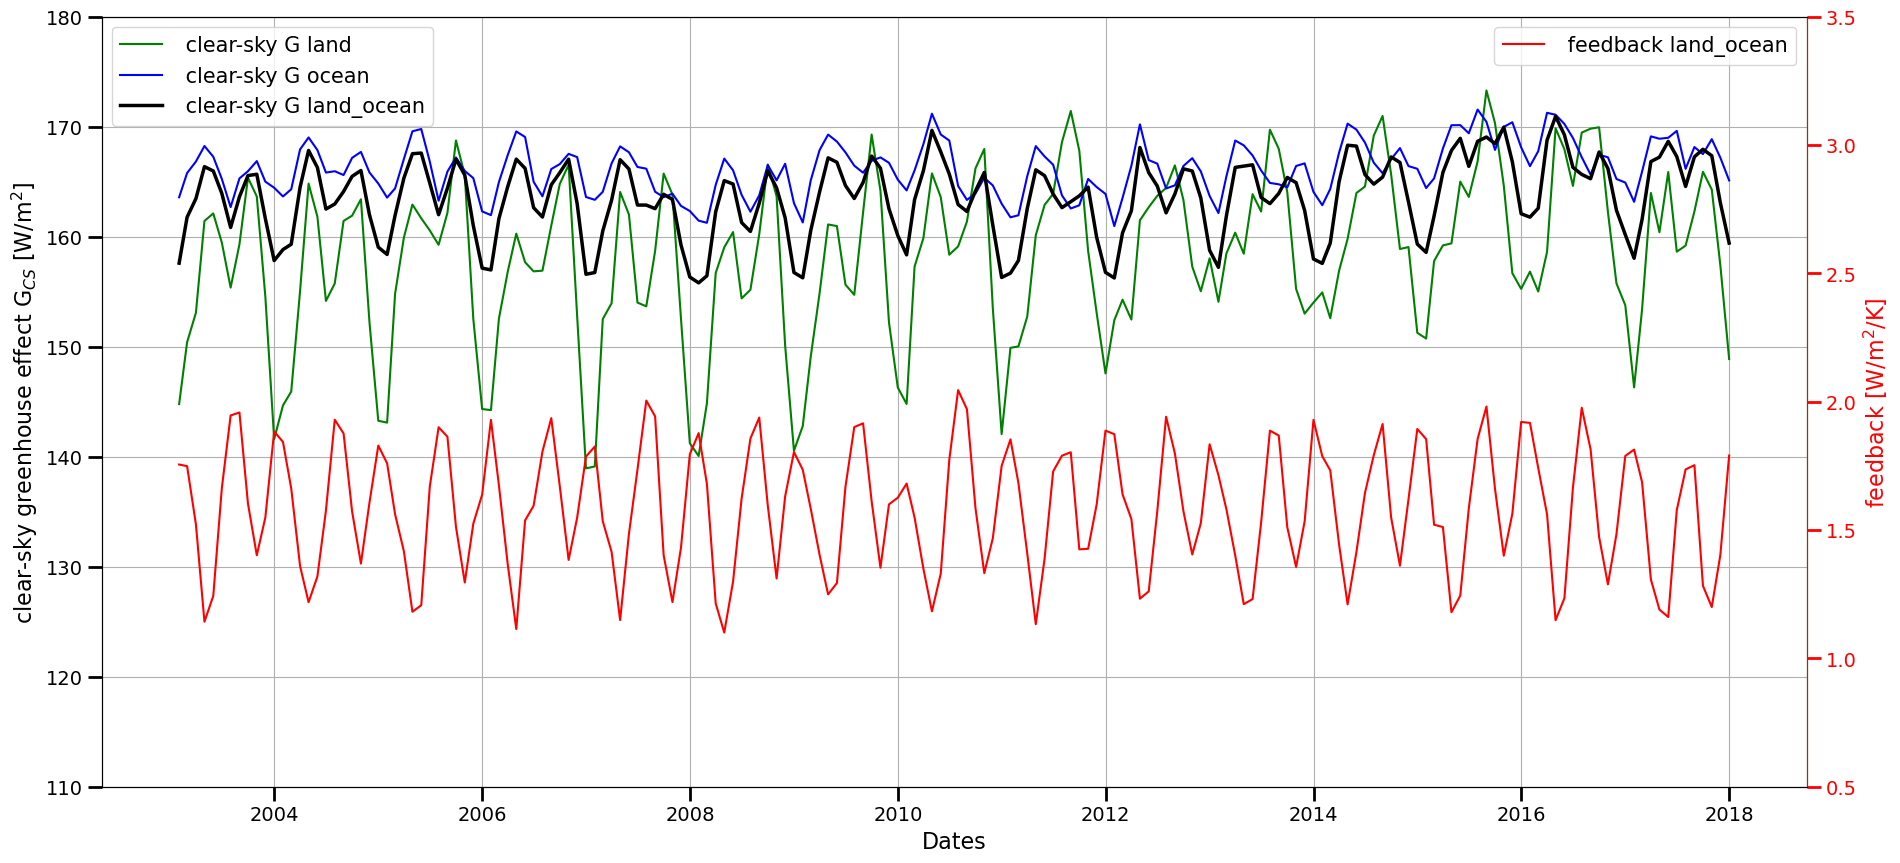

In [31]:
fig , axs = plt.subplots(1, figsize =(22,10))
ax2 = axs.twinx()

for idx, surf in enumerate (surface):
    df_GCS_surf = df_monthly[f"df_monthly_{surf}"]['GCS'].resample("M").mean()
    if surf == 'land_ocean':
        ax2.plot(season_cycle_feedback_surf[f'{surf}'].index, season_cycle_feedback_surf[f'{surf}'], label = f" feedback {surf}", color = "red"  )
        ax2.set_ylabel("feedback [W/m$^2$/K]", color = 'red', fontsize=16)
        ax2.tick_params(axis='y', colors='red', which='major', length=10, width=2, labelsize=14)
        ax2.spines['right'].set_color('red')
        ax2.legend(loc = 'upper right', fontsize = 15)
        ax2.set_ylim(0.5,3.5)
        axs.plot(df_GCS_surf.index,df_GCS_surf,  label = f" clear-sky G {surf}", color = f'{colors_fig[idx]}', linewidth = 2.5 )
    
    
    else :
        axs.plot(df_GCS_surf.index,df_GCS_surf,  label = f" clear-sky G {surf}", color = f'{colors_fig[idx]}' )

    axs.tick_params(axis='both', which='major', length=10, width=2, labelsize=14)
    axs.set_ylabel("clear-sky greenhouse effect G$_{CS}$ [W/m$^2$]", fontsize=16)
    axs.set_xlabel("Dates", fontsize=16)
    axs.set_ylim(110,180)
    axs.legend( loc = 'upper left' ,fontsize = 15)
    axs.grid(True)



___Figure 3__: Time series of the Clear-Sky greenhouse effect (left axis) over land (green), ocean (blue), and combined surfaces (black), and of the water-vapor feedback (right axis, red) over combined surfaces, for the period 2003–2017 averaged over 30°N–30°S._

The time series of Clear-Sky greenhouse effect over both surface types, show a seasonal variation. Compared to the ocean surfaces, the land surfaces show a higher amplitude which has already been emphasized in the literature [[15]](https://doi.org/10.1029/94JD00482). This range is less significant from 2012 to 2016, which corresponds to the end of MERIS instrument's life indicated in the data record [__TCWV__](https://confluence.ecmwf.int/pages/viewpage.action?pageId=288334849) and this decrease can be explained by a change in the resampling data for the product. Finally, it is interesting to note that the maximums over land are slightly delayed in time compared to maximums over the oceans.

The time series of water vapor feedback from combined surfaces also shows seasonal variation but opposite to that of the Clear-Sky greenhouse effect and stay always posivitive around 1.7 W/m$^2$/K with no clear trend.

As seen before, the Clear-Sky greenhouse effect and water vapor feedback show periodic variations so it can be interesting to study the seasonal cycle which is the regular repetition of seasonal variations throughout the years.

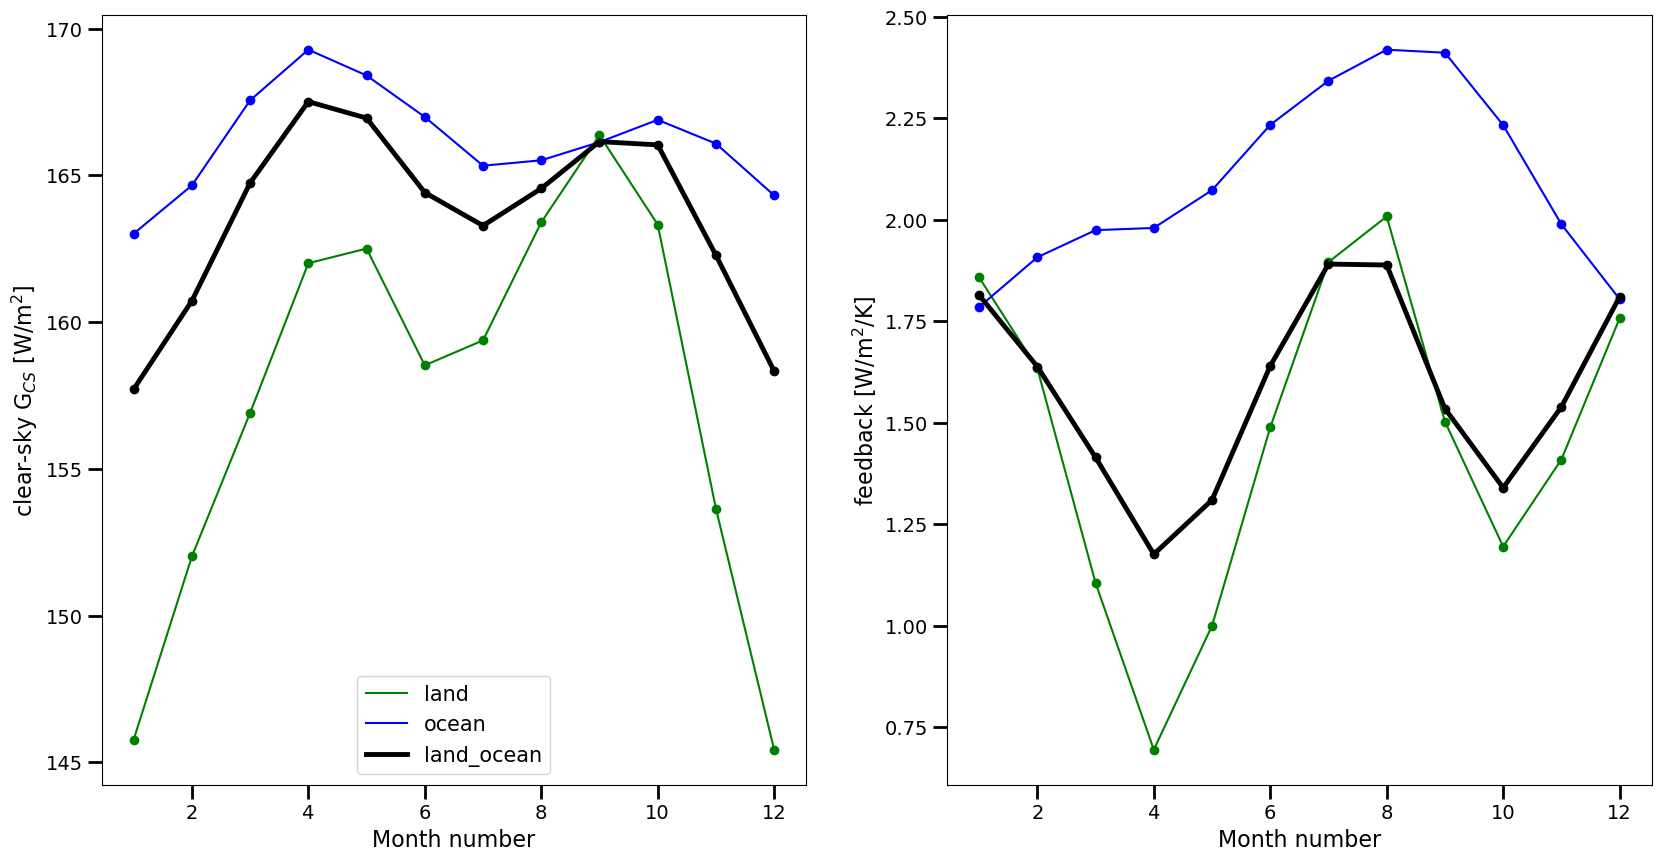

In [29]:
fig , axs = plt.subplots(1,2, figsize =(20,10))

for i in range (2):
    for idx, surf in enumerate (surface):
        if i == 0 : 
            df_GCS_month_mean_surf = df_monthly[f"df_monthly_{surf}"]['GCS'].groupby(df_monthly[f"df_monthly_{surf}"].index.month).mean()

            if surf == 'land_ocean':
                axs[i].plot(df_GCS_month_mean_surf.index,df_GCS_month_mean_surf, color = f'{colors_fig[idx]}', linewidth = 3.5, label = f"{surf}" )
                axs[i].scatter(df_GCS_month_mean_surf.index,df_GCS_month_mean_surf, color = f'{colors_fig[idx]}')
            else :
                axs[i].plot(df_GCS_month_mean_surf.index,df_GCS_month_mean_surf, color = f'{colors_fig[idx]}', label = f"{surf}" )
                axs[i].scatter(df_GCS_month_mean_surf.index,df_GCS_month_mean_surf, color = f'{colors_fig[idx]}')
                
            axs[i].tick_params(axis='both', which='major', length=10, width=2, labelsize=14)    
            axs[i].legend(loc = 'best', fontsize = 15)
            axs[i].set_xlabel("Month number", fontsize=16)
            axs[i].set_ylabel("clear-sky G$_{CS}$ [W/m$^2$]", fontsize=16)
        else :

            season_cycle_feedback_surf_mean = season_cycle_feedback_surf[f"{surf}"].groupby(season_cycle_feedback_surf[f"{surf}"].index.month).mean()

            if surf == 'land_ocean':
                axs[i].plot(season_cycle_feedback_surf_mean.index,season_cycle_feedback_surf_mean, color = f'{colors_fig[idx]}', linewidth = 3.5 )
                axs[i].scatter(season_cycle_feedback_surf_mean.index,season_cycle_feedback_surf_mean, color = f'{colors_fig[idx]}')
            else :
                axs[i].plot(season_cycle_feedback_surf_mean.index,season_cycle_feedback_surf_mean, color = f'{colors_fig[idx]}' )
                axs[i].scatter(season_cycle_feedback_surf_mean.index,season_cycle_feedback_surf_mean, color = f'{colors_fig[idx]}')

            
            axs[i].tick_params(axis='both', which='major', length=10, width=2, labelsize=14) 
            axs[i].set_xlabel("Month number", fontsize=16)
            axs[i].set_ylabel("feedback [W/m$^2$/K]", fontsize=16)

___Figure 4__: Seasonal cycle of the Clear-Sky greenhouse effect (left) and water vapor feedback (right) over 30°N-30°S for land (green), ocean (blue) and combined surfaces (black) for the period 2003-2017._

In addition to what has already been said concerning the time series in figure 3, it can be seen that the maximum of the Clear-Sky greenhouse effect is during the summer of the Northern Hemispheric (NH) and Southern Hemisphere (SH) for ocean and land, respectively, which is in agreement with the literature [[16]](https://doi.org/10.1029/2019JD031017). It should be noted that the values are higher than the literature because we focus here on the warm equatorial belt, know for its extreme values in the water cycle. As in this areas there are more ocean surfaces than land surfaces, the maximum of the Clear-Sky greenhouse effect is during SH's summer. 

Finally, it can be interesting to compare the Clear-Sky Greenhouse Effect and the water vapor feedback with ENSO events. To remove the seasonal variation of the Clear-Sky Greenhouse Effect, this analysis uses the deseasonalized anomalies of the Clear-Sky Greenhouse Effect, which are defined as deviations from the seasonal mean.

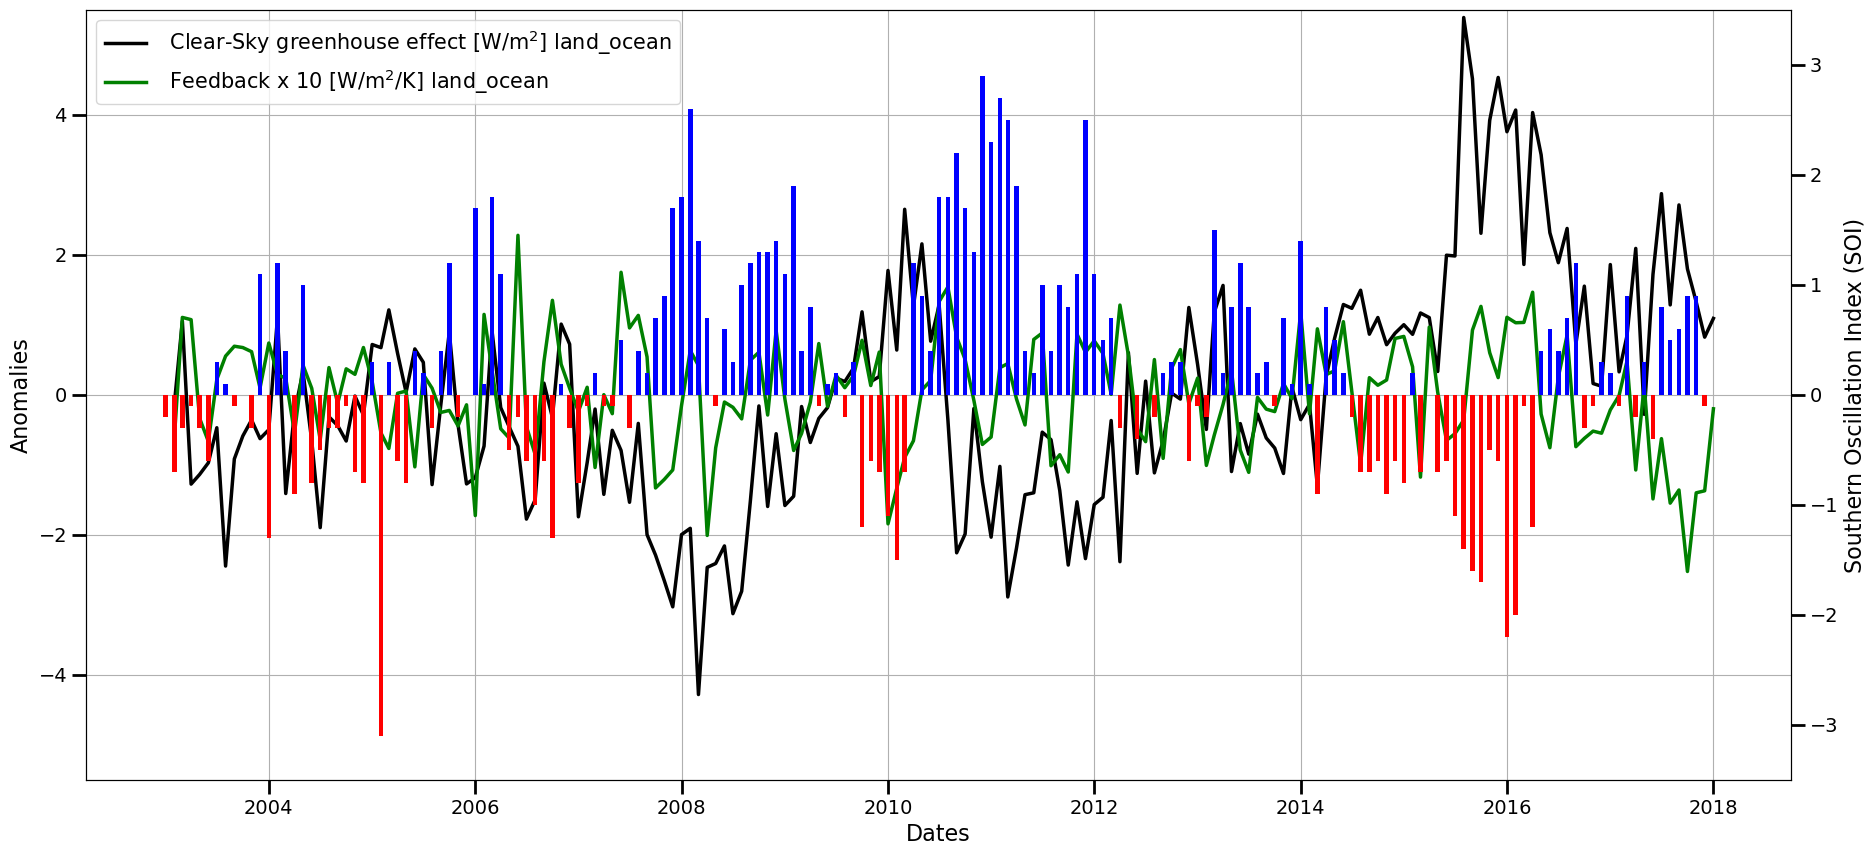

In [88]:
fig , axs = plt.subplots (1, figsize =(22,10), sharex = True )
ax2 = axs.twinx()
        
df_GCS_month_mean_surf = df_monthly["df_monthly_land_ocean"]['GCS'].groupby(df_monthly["df_monthly_land_ocean"].index.month).mean()
a = df_monthly["df_monthly_land_ocean"]['GCS'].groupby(df_monthly["df_monthly_land_ocean"].index.to_period("M")).mean()

season_cycle_feedback_surf_mean = season_cycle_feedback_surf["land_ocean"].groupby(season_cycle_feedback_surf["land_ocean"].index.month).mean()
b = season_cycle_feedback_surf["land_ocean"].groupby(season_cycle_feedback_surf["land_ocean"].index.to_period("M")).mean()

anomalies_feedback = b['feedback'] - b.index.month.map(season_cycle_feedback_surf_mean.squeeze())

anomalies_surf = a - a.index.month.map(df_GCS_month_mean_surf)

colors = ['blue' if x > 0 else 'red' for x in df_long['ANOMALY']]
ax2.bar(df_long['DATE'], df_long['ANOMALY'], width=16, color = colors )
axs.set_xlabel("Dates",fontsize=16)
ax2.set_ylim(-3.5,3.5)
ax2.tick_params(axis='y', which='major', length=10, width=2, labelsize=14)
ax2.set_ylabel("Southern Oscillation Index (SOI)", fontsize=16)

axs.plot(anomalies_surf.index.to_timestamp(how="end"),anomalies_surf, label = f" Clear-Sky greenhouse effect [W/m$^2$] {surf}", color = 'k', linewidth = 2.5 )
axs.plot(anomalies_feedback.index.to_timestamp(how="end"),anomalies_feedback *10, label = f" Feedback x 10 [W/m$^2$/K] {surf}", color = 'green', linewidth = 2.5 )
axs.set_ylim(-5.5,5.5)
axs.tick_params(axis='both', which='major', length=10, width=2, labelsize=14)
axs.set_ylabel("Anomalies",  fontsize=16)
axs.grid(True)
axs.legend(fontsize = 15)


____Figure 5___: Deseasonalized anomalies of Clear-Sky greenhouse effect (black) and of water vapor feedback multiplied by 10 (green), (left axis), over 30°N-30°S for the combined surfaces (black) for the period 2003-2017. Southern Oscillation Index (SOI) (right axis) for the period 2003-2017, made with available data on [__NOAA website__](https://www.ncei.noaa.gov/access/monitoring/enso/soi). The colors red and blue correspond to El Niño and La Niña episodes, respectively._

The time series of deseasonalized anomalies of Clear-Sky greenhouse effect shows a relative correlation with the Southern Oscillation Index (SOI). overall, La Niña event (blue) is link to a negative anomalies of Clear-Sky greenhouse effect because the Earth becomes colder and inversally,  El Niño event (red) is link to a positive anomalies of Clear-Sky greenhouse effect because the Earth becomes warmer which can be seen in the literature [[19]](https://doi.org/full/10.1029/2019JD031017).   

## ℹ️ If you want to know more
### Key resources
Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entries for the data used in this assessment are:
- [__Global monthly and daily high-spatial resolution of total column water vapour from 2002 to 2017 derived from satellite observations__](https://cds.climate.copernicus.eu/datasets/satellite-total-column-water-vapour-land-ocean)

- [__Cloud properties global gridded monthly and daily data from 1979 to present derived from satellite observations__](https://cds.climate.copernicus.eu/datasets/satellite-cloud-properties)

- [__ERA5 post-processed daily statistics on single levels from 1940 to present__](https://cds.climate.copernicus.eu/datasets/derived-era5-single-levels-daily-statistics)

- [__Earth's radiation budget from 1979 to present derived from satellite observations__](https://cds.climate.copernicus.eu/datasets/satellite-earth-radiation-budget)

- [__National Centers for Environmental Information__](https://www.cpc.ncep.noaa.gov/data/indices/soi)

Code libraries used:
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`, prepared by [B-Open](https://www.bopen.eu/)

And some resources on the greenhouse effect of water vapor and its feedback :
- https://science.nasa.gov/earth/climate-change/steamy-relationships-how-atmospheric-water-vapor-amplifies-earths-greenhouse-effect/

- https://wmo.int/media/magazine-article/observing-water-vapour

### References

[[1]](https://doi.org/10.1029/2010JD014287) Schmidt G. A., Ruedy R. A., Miller R. L., and A. A. Lacis (2010), Attribution of the present‐day total greenhouse effect,J. Geophys. Res.,115, D20106, doi:10.1029/2010JD014287

[[2]](https://journals.ametsoc.org/view/journals/bams/78/2/1520-0477_1997_078_0197_eagmeb_2_0_co_2.xml) Kiehl J. T. and K. Trenberth (1997), Earth's Annual Global Mean Energy Budget, Bull. Am. Meteorol. Soc., 78, 197-208, https://doi.org/10.1175/1520-0477%281997%29078<0197:EAGMEB>2.0.CO;2

[[3]](https://doi.org/10.1175/1520-0469%281967%29024<0241:TEOTAW>2.0.CO;2) Manabe S., and R. T. Wetherald (1967), Thermal Equilibrium of the Atmosphere with a Given Distribution of Relative Humidity, J. Atmos. Sci., 24, 241–259, https://doi.org/10.1175/1520-0469%281967%29024<0241:TEOTAW>2.0.CO;2 

[[4]](https://doi.org/10.1146/annurev.energy.25.1.441) Held I. and B. Soden (2000), Water vapor feedback and global warming, Annu. Rev. Energy Environn., 25:441-75, doi:10.1146/annurev.energy.25.1.441

[[5]](https://doi.org/10.1073/pnas.1809868115), Koll D. and T. Cronin (2018) Earth’s outgoing longwave radiation linear due to H2O greenhouse effect, Proc. Nat. Ac. Sci., 115 (41) 10293-10298, doi:10.1073/pnas.1809868115

[[6]](https://doi.org/full/10.1029/2000JD000040)  Roca R., Viollier M., Picon L., and M. Desbois (2002), A multisatellite analysis of deep convection and its moist environment over the Indian Ocean during the winter monsoon, J. Geophys. Res., 107(D19), doi:10.1029/2000JD000040.

[[7]](https://doi.org/10.1002/2013JD020184) Gordon N., A. Jonko, P. Forster and K. Shell (2013), An observationally based constraint on the water-vapor feedback, J. Geophys. Res., 118, 12,435-12,443, doi:10.1002/2013JD020184.

[[8]](https://doi.org/10.1029/2019JD031017) Raghuraman S. P., D. Paynter and V. Ramaswamy (2019), Quantifying the drivers of the clear sky greenhouse effect, 2000-2016, J. Geophys. Res, 124, 11,354-11,371, https://doi.org/10.1029/2019JD031017

[[9]](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter07.pdf) Forster P., Storelvmo T., Armour K., Collins W., Dufresne J-L, Frame D., Lunt D.J., Mauritsen T., Palmer M.D., Watanabe M., Wild M., and H. Zhang (2021), Chapter 7 The Earth’s Energy Budget, Climate Feedbacks, and Climate Sensitivity. In Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA, pp. 923–1054, doi: 10.1017/9781009157896.009.

[[10]](https://doi.org/abs/10.1029/1998JD900007) Inamdar A. and V. Ramanathan (1998), Tropical and global scale interactions among water vapor, greenhouse effect and surface temperature, J. Geophys. Res, 103, D24, 32,177-32,194, doi: https://doi.org/10.1029/1998JD900007

[[11]](https://journals.ametsoc.org/view/journals/clim/19/21/jcli3990.1.xml) Held I. and B. Soden (2006), Robust responses of the hydrological cycle to global warming, J. Clim., 19, 5686–5699, https://doi.org/10.1175/JCLI3990.1 

[[12]](https://journals.ametsoc.org/view/journals/clim/19/1/jcli3611.1.xml?utm_source=wiley&getft_integrator=wiley) Forster P. and J. Gregory (2006), the climate sensitivity and its components diagnosed from earth radiation budget data, J. Clim., 19, 39-52, doi:10.1175/JCLI3611.1. 

[[13]](https://doi.org/10.1038/351027a0) Ramanathan V. and W. Collins (1991), Thermodynamic regulation of ocean warming by cirrus clouds deduced from observations of the 1987 El Nino, Nature, 351, 27-32. 

[[14]](https://doi.org/epdf/10.1029/92JD00729) Kiehl J. and B. Briegleb (1992), Comparison of the observed and calculated sky sky greenhouse effect: implications for climate studies, J. Geophys. Res, 97, 10,037-10,049.

[[15]](https://doi.org/10.1029/94JD00482) Bony, S., and J.-P. Duvel (1994), Influence of the vertical structure of the atmosphere on the seasonal variation of precipitable water and greenhouse effect, J. Geophys. Res., 99(D6), 12963–12980, doi:10.1029/94JD00482.

[[16]](https://doi.org/10.1029/2019JD031017) Raghuraman, S. P., Paynter, D., & Ramaswamy, V. (2019). Quantifying the drivers of the clear sky greenhouse effect, 2000–2016. Journal of Geophysical Research: Atmospheres, 124, 11354–11371. https://doi.org/10.1029/2019JD031017